In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly



In [107]:
#helping functions

def lower_text(df):

#lowcase all text columns in df, returns a df derived from the input 
#df with text columns in lowcase

    df1 = df.select_dtypes(include='object')
    df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else "")
    df_cp = df.copy()
    for c in df1.columns:
        df_cp[c] = df1[c]
    return df_cp


def strip_text(df):
#stip all text columns in df, returns a df derived from the input 
#df with text columns not having any spaces at the beginning and endding

    df1 = df.select_dtypes(include='object')
    df1 = df1.applymap(lambda x: x.strip() if isinstance(x, str) else "")
    df_cp = df.copy()
    for c in df1.columns:
        df_cp[c] = df1[c]
    return df_cp



In [108]:
df_area = pd.read_csv("./data/BureauLaborStats/AP/ap.area", delimiter = "\t")
df_current = pd.read_csv("./data/BureauLaborStats/AP/ap.data.0.Current", delimiter = "\t")

df_householdfuels = pd.read_csv("./data/BureauLaborStats/AP/ap.data.1.HouseholdFuels", delimiter = "\t")
df_gasoline = pd.read_csv("./data/BureauLaborStats/AP/ap.data.2.Gasoline", delimiter = "\t")
df_food = pd.read_csv("./data/BureauLaborStats/AP/ap.data.3.Food", delimiter = "\t")

df_series = pd.read_csv("./data/BureauLaborStats/AP/ap.series", delimiter = "\t")
df_item = pd.read_csv("./data/BureauLaborStats/AP/ap.item", delimiter = "\t")

df_period = pd.read_csv("./data/BureauLaborStats/AP/ap.period", delimiter = "\t")
df_seasonal = pd.read_csv("./data/BureauLaborStats/AP/ap.seasonal", delimiter = "\t")

df_series['series_title'] = df_series.series_title.str.lower()
df_item['item_name'] = df_item.item_name.str.lower()


#df_item[df_item.item_name.str.contains('banana')]

/tmp/ipykernel_46868/2042767144.py:6: DtypeWarning:

Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.



In [109]:
df_area.columns    #['area_code', 'area_name']
df_area = strip_text(df_area)
df_area = lower_text(df_area)
df_area.info()

df_current.rename(columns={"series_id        ": "series_id", "       value": "value"}, inplace = True)
df_current.columns # ['series_id', 'year', 'period', 'value', 'footnote_codes']
df_current = strip_text(df_current)
df_current = lower_text(df_current)
df_current.value = pd.to_numeric(df_current.value, errors='coerce')
df_current.info()


df_householdfuels.rename(columns={"series_id        ": "series_id", "       value": "value"}, inplace = True)
df_householdfuels.columns #['series_id', 'year', 'period', 'value', 'footnote_codes']
df_householdfuels = strip_text(df_householdfuels)
df_householdfuels = lower_text(df_householdfuels)
df_householdfuels.value = pd.to_numeric(df_householdfuels.value, errors='coerce')
df_householdfuels.info()


df_gasoline.rename(columns={"series_id        ": "series_id", "       value": "value"}, inplace = True)
df_gasoline.columns #['series_id', 'year', 'period', 'value', 'footnote_codes']
df_gasoline = strip_text(df_gasoline)
df_gasoline = lower_text(df_gasoline)
df_gasoline.value = pd.to_numeric(df_gasoline.value, errors='coerce')
df_gasoline.info()

df_food.rename(columns={"series_id        ": "series_id", "       value": "value"}, inplace = True)
df_food.columns #['series_id', 'year', 'period', 'value', 'footnote_codes']
df_food = strip_text(df_food)
df_food = lower_text(df_food)
df_food.value = pd.to_numeric(df_food.value, errors='coerce')
df_food.info()

df_series.rename(columns={"series_id        ": "series_id"}, inplace = True)
df_series.columns #'series_id', 'area_code', 'item_code', 'series_title', 'footnote_codes',
                  #'begin_year', 'begin_period', 'end_year', 'end_period']
df_series = strip_text(df_series)
df_series = lower_text(df_series)
df_series.info()

df_item.columns #['item_code', 'item_name']
df_item = strip_text(df_item)
df_item = lower_text(df_item)
df_item.info()

df_period.columns #['period', 'period_abbr', 'period_name']
df_period = strip_text(df_period)
df_period = lower_text(df_period)
df_period.info()

df_seasonal.columns #['seasonal_code', 'seasonal_text']
df_seasonal = strip_text(df_seasonal)
df_seasonal = lower_text(df_seasonal)
df_seasonal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   area_code  74 non-null     object
 1   area_name  74 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193589 entries, 0 to 193588
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   series_id       193589 non-null  object 
 1   year            193589 non-null  int64  
 2   period          193589 non-null  object 
 3   value           193581 non-null  float64
 4   footnote_codes  0 non-null       float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103977 entries, 0 to 103976
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   s

In [110]:
df_series_item = pd.merge(df_series, df_item, left_on = 'item_code', right_on ='item_code', how = 'inner' )
#df_series_item[df_series_item.item_name.str.contains('gas')].head(20)


In [111]:
df_food_price = pd.merge(df_series_item, df_food, on = ['series_id'], how = 'inner' )
df_food_price

,series_id,area_code,item_code,series_title,footnote_codes_x,begin_year,begin_period,end_year,end_period,item_name,year,period,value,footnote_codes_y
0,apu0000701111,0000,701111,"flour, white, all purpose, per lb. (453.6 gm) ...",NaN,1980,m01,2023,m03,"flour, white, all purpose, per lb. (453.6 gm)",1980,m01,0.203,NaN
1,apu0000701111,0000,701111,"flour, white, all purpose, per lb. (453.6 gm) ...",NaN,1980,m01,2023,m03,"flour, white, all purpose, per lb. (453.6 gm)",1980,m02,0.205,NaN
2,apu0000701111,0000,701111,"flour, white, all purpose, per lb. (453.6 gm) ...",NaN,1980,m01,2023,m03,"flour, white, all purpose, per lb. (453.6 gm)",1980,m03,0.211,NaN
3,apu0000701111,0000,701111,"flour, white, all purpose, per lb. (453.6 gm) ...",NaN,1980,m01,2023,m03,"flour, white, all purpose, per lb. (453.6 gm)",1980,m04,0.206,NaN
4,apu0000701111,0000,701111,"flour, white, all purpose, per lb. (453.6 gm) ...",NaN,1980,m01,2023,m03,"flour, white, all purpose, per lb. (453.6 gm)",1980,m05,0.207,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141780,apu0400fs1101,0400,fs1101,"butter, stick, per lb. (453.6 gm) in west, ave...",NaN,2018,m04,2023,m03,"butter, stick, per lb. (453.6 gm)",2022,m11,NaN,NaN
141781,apu0400fs1101,0400,fs1101,"butter, stick, per lb. (453.6 gm) in west, ave...",NaN,2018,m04,2023,m03,"butter, stick, per lb. (453.6 gm)",2022,m12,NaN,NaN
141782,apu0400fs1101,0400,fs1101,"butter, stick, per lb. (453.6 gm) in west, ave...",NaN,2018,m04,2023,m03,"butter, stick, per lb. (453.6 gm)",2023,m01,NaN,NaN
141783,apu0400fs1101,0400,fs1101,"butter, stick, per lb. (453.6 gm) in west, ave...",NaN,2018,m04,2023,m03,"butter, stick, per lb. (453.6 gm)",2023,m02,NaN,NaN


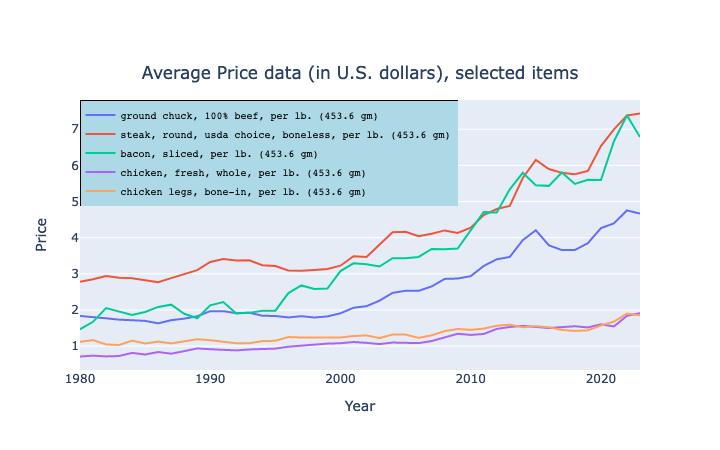

In [112]:
#Task1
food_names = ['chicken', 'beef', 'pork', 'steak', 'bacon']

df1 = pd.DataFrame(columns = df_food_price.columns)
for s in food_names:
    df = df_food_price[df_food_price['item_name'].str.contains(s)]
    df1 = pd.concat([df1, df], axis = 'rows')
    

df1 = df1.groupby(['item_code', 'year']).agg({'value':'mean'})
df1 = df1.reset_index()
df1 = pd.merge(df1, df_item, on = 'item_code')
uniq_item_codes = df1['item_code'].unique()
uniq_years = df1['year'].unique()

#reserve the item_codes for next task
uniq_item_code_T1 = []

data = []

for ic in uniq_item_codes:
    df = df1[df1['item_code'] == ic]    
    if df.shape[0] < len(uniq_years):
        continue

    uniq_item_code_T1.append(ic)
    trace = go.Scatter(
                    x = df.year,
                    y = df.value,
                    mode = "lines",
                    name = df['item_name'].values[0],
                    #marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df['item_name'].values[0])

    data.append(trace)

layout = go.Layout(
        width=700, height=450,    
        title=go.layout.Title(text='Average Price data (in U.S. dollars), selected items', 
                              y = 0.85, x = 0.5, xanchor = 'center', yanchor = 'top'),
        legend = dict(y = 1, x = 0, title_font_family="Times New Roman",
                      font=dict(
                                family="Courier",
                                size=10,
                                color="black"),
                      bgcolor="LightBlue",
                      bordercolor="Black",
                      borderwidth=0.5),
        xaxis=dict(title = 'Year', showgrid=False),
        yaxis=dict(title= 'Price', showgrid=True),
        showlegend=True
    )

fig = go.Figure(data = data, layout = layout)
fig.show()


In [113]:
len(df1['item_code'].unique())

30

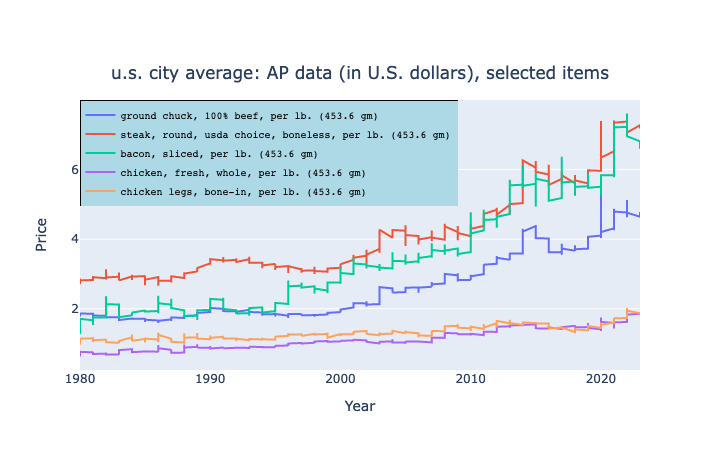

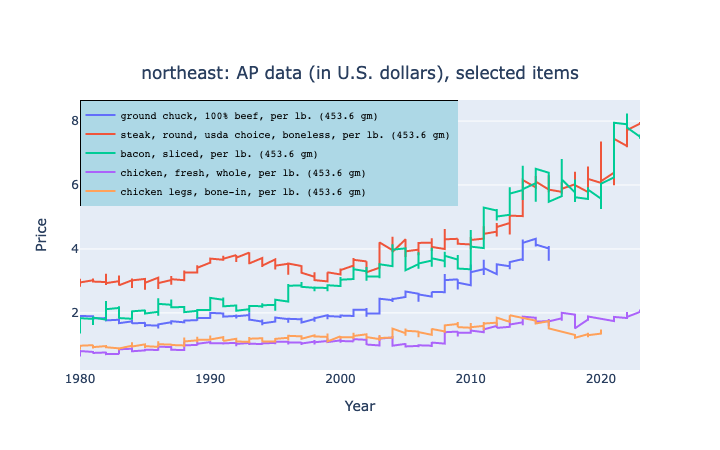

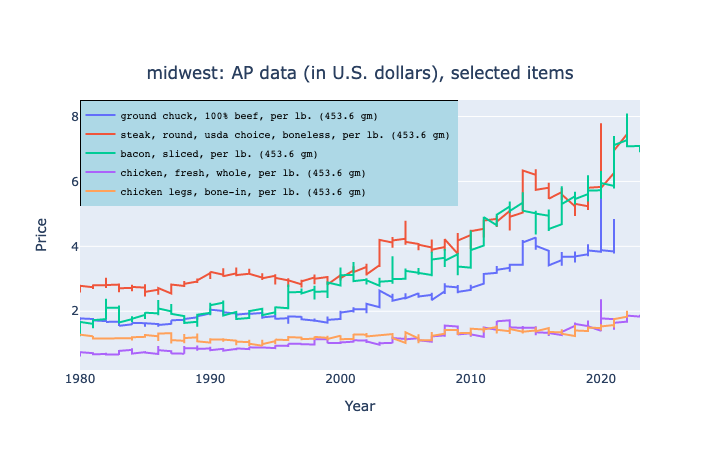

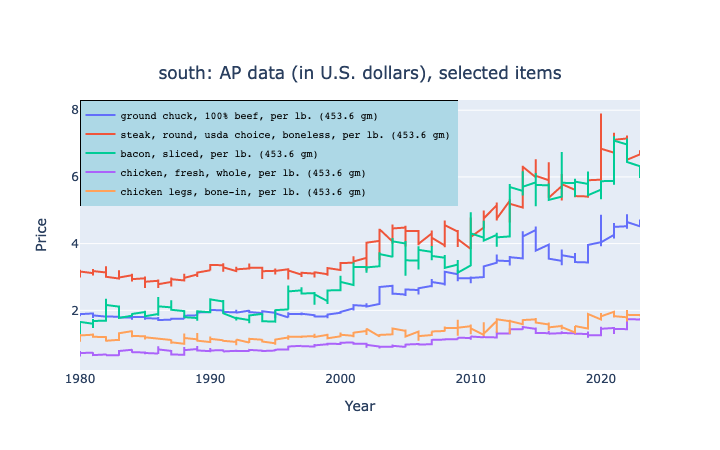

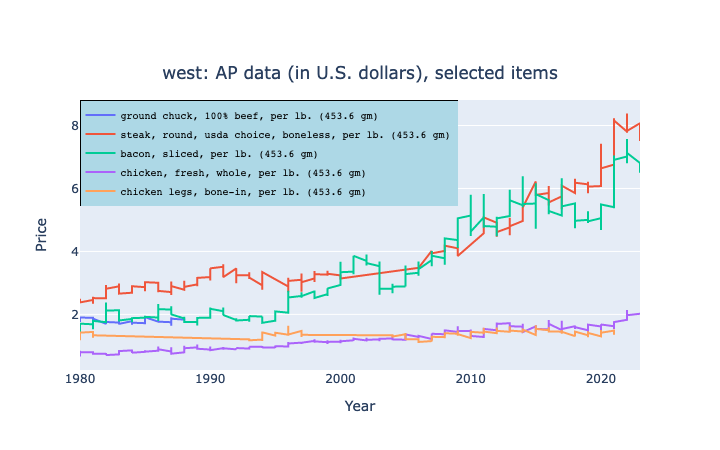

In [114]:
#Task2

def plot_by_area_code(df):
    
    uniq_item_codes = uniq_item_code_T1 #df['item_code'].unique()
    uniq_years = df['year'].unique()

    data = []
    for ic in uniq_item_codes:
        df1 = df[df['item_code'] == ic].copy()       

        df1.sort_values(by = ['year', 'period'], ascending = True, inplace = True)
        trace = go.Scatter(x = df1.year, y = df1.value,
                        mode = "lines",
                        name = df1['item_name'].values[0],
                        #marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                        text= df1['item_name'].values[0])

        data.append(trace)

    layout = go.Layout(
            width=700, height=450,    
            title=go.layout.Title(text=df['area_name'].values[0] + ': AP data (in U.S. dollars), selected items', 
                                  y = 0.85, x = 0.5, xanchor = 'center', yanchor = 'top'),
            legend = dict(y = 1, x = 0, title_font_family="Times New Roman",
                          font=dict(
                                    family="Courier",
                                    size=10,
                                    color="black"),
                          bgcolor="LightBlue",
                          bordercolor="Black",
                          borderwidth=0.5),
            xaxis=dict(title = 'Year', showgrid=False),
            yaxis=dict(title= 'Price', showgrid=True),
            legend_tracegroupgap=180,
            showlegend=True
        )

    fig = go.Figure(data = data, layout = layout)
    fig.show()
 
    
    
food_names = ['chicken', 'beef', 'pork', 'steak, round', 'bacon']

df1 = pd.DataFrame(columns = df_food_price.columns)
for s in food_names:
    df = df_food_price[df_food_price['item_name'].str.contains(s)]
    df1 = pd.concat([df1, df], axis = 'rows')
    

df1 = pd.merge(df1, df_area, on = 'area_code')
uniq_area_codes = df1['area_code'].unique()

for ac in uniq_area_codes:
    df = df1[df1['area_code'] == ac]
    plot_by_area_code(df) 
    

In [115]:
df_gasoline_price = pd.merge(df_series_item, df_gasoline, on = ['series_id'], how = 'inner' )
df_gasoline_price

,series_id,area_code,item_code,series_title,footnote_codes_x,begin_year,begin_period,end_year,end_period,item_name,year,period,value,footnote_codes_y
0,apu000074712,0000,74712,"gasoline, leaded regular (cost per gallon/3.8 ...",NaN,1973,m10,1991,m04,"gasoline, leaded regular (cost per gallon/3.8 ...",1973,m10,0.402,NaN
1,apu000074712,0000,74712,"gasoline, leaded regular (cost per gallon/3.8 ...",NaN,1973,m10,1991,m04,"gasoline, leaded regular (cost per gallon/3.8 ...",1973,m11,0.418,NaN
2,apu000074712,0000,74712,"gasoline, leaded regular (cost per gallon/3.8 ...",NaN,1973,m10,1991,m04,"gasoline, leaded regular (cost per gallon/3.8 ...",1973,m12,0.437,NaN
3,apu000074712,0000,74712,"gasoline, leaded regular (cost per gallon/3.8 ...",NaN,1973,m10,1991,m04,"gasoline, leaded regular (cost per gallon/3.8 ...",1974,m01,0.465,NaN
4,apu000074712,0000,74712,"gasoline, leaded regular (cost per gallon/3.8 ...",NaN,1973,m10,1991,m04,"gasoline, leaded regular (cost per gallon/3.8 ...",1974,m02,0.491,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90657,apus49g7471a,s49g,7471a,"gasoline, all types, per gallon/3.785 liters i...",NaN,1978,m01,2023,m03,"gasoline, all types, per gallon/3.785 liters",2022,m11,4.608,NaN
90658,apus49g7471a,s49g,7471a,"gasoline, all types, per gallon/3.785 liters i...",NaN,1978,m01,2023,m03,"gasoline, all types, per gallon/3.785 liters",2022,m12,3.974,NaN
90659,apus49g7471a,s49g,7471a,"gasoline, all types, per gallon/3.785 liters i...",NaN,1978,m01,2023,m03,"gasoline, all types, per gallon/3.785 liters",2023,m01,3.851,NaN
90660,apus49g7471a,s49g,7471a,"gasoline, all types, per gallon/3.785 liters i...",NaN,1978,m01,2023,m03,"gasoline, all types, per gallon/3.785 liters",2023,m02,3.855,NaN


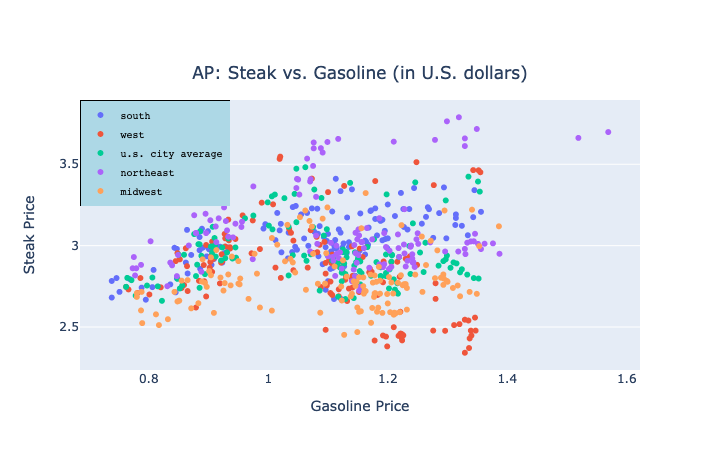

In [116]:
#task3
selected_col = ['area_code','year', 'period', 'value', 'item_code', 'item_name']
years = [1980, 2023]

df31 = df_food_price[selected_col]
df31 = df31[(df31.year >= years[0]) & (df31.year <= years[1])]
df32 = df_gasoline_price[selected_col]
df32 = df32[(df32.year >= years[0]) & (df32.year <= years[1])]

df3 = pd.merge(df31, df32, on = ['area_code', 'year', 'period'], suffixes=('_food', '_gas'), how = 'inner')
#df3

food_item = 'steak, round, usda choice, boneless, per lb. (453.6 gm)'
gas_item = 'gasoline, leaded regular (cost per gallon/3.8 liters)'

df_scatter = df3[(df3['item_name_food'] == food_item) & (df3['item_name_gas'] == gas_item)]
df_scatter = pd.merge(df_scatter, df_area, on = 'area_code')
df_scatter.sort_values(by = ['value_gas'], ascending = True, inplace = True)
uniq_area_codes = df_scatter['area_code'].unique()


data = []

for ac in uniq_area_codes:
        df = df_scatter[df_scatter['area_code'] == ac].copy()       

        trace = go.Scatter(x = df.value_gas, y = df.value_food,
                        mode = "markers",
                        name = df['area_name'].values[0],
                        #marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                        text= df.year.astype(str))

        data.append(trace)
        
        
        
        
layout = go.Layout(
            width=700, height=450,    
            title=go.layout.Title(text='AP: Steak vs. Gasoline (in U.S. dollars)', 
                                  y = 0.85, x = 0.5, xanchor = 'center', yanchor = 'top'),
            legend = dict(y = 1, x = 0, title_font_family="Times New Roman",
                          font=dict(
                                    family="Courier",
                                    size=10,
                                    color="black"),
                          bgcolor="LightBlue",
                          bordercolor="Black",
                          borderwidth=0.5),
            xaxis=dict(title = 'Gasoline Price', showgrid=False),
            yaxis=dict(title= 'Steak Price', showgrid=True),
            showlegend=True
        )

fig = go.Figure(data = data, layout = layout)
fig.show()





In [117]:
df_scatter['area_code']


448    0300
449    0300
447    0300
445    0300
627    0400
       ... 
151    0100
401    0200
150    0100
267    0100
266    0100
Name: area_code, Length: 680, dtype: object

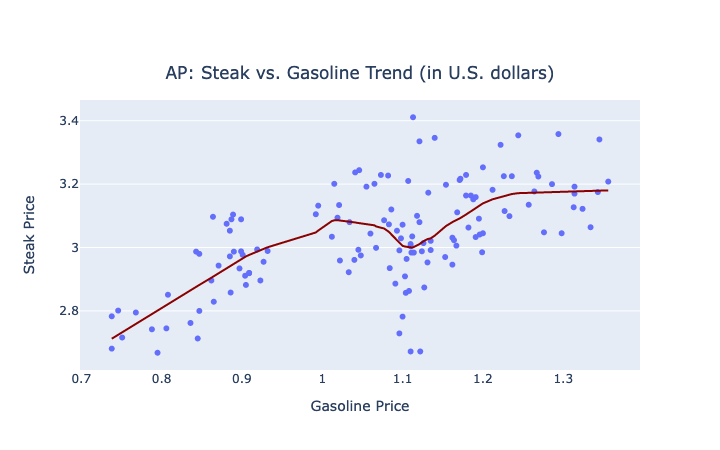

In [118]:
#Task4: https://plotly.com/python/linear-fits/
import plotly.express as px

selected_col = ['area_code','year', 'period', 'value', 'item_code', 'item_name']
years = [1980, 2023]

df31 = df_food_price[selected_col]
df31 = df31[(df31.year >= years[0]) & (df31.year <= years[1])]
df32 = df_gasoline_price[selected_col]
df32 = df32[(df32.year >= years[0]) & (df32.year <= years[1])]

df3 = pd.merge(df31, df32, on = ['area_code', 'year', 'period'], suffixes=('_food', '_gas'), how = 'inner')
#df3

food_item = 'steak, round, usda choice, boneless, per lb. (453.6 gm)'
gas_item = 'gasoline, leaded regular (cost per gallon/3.8 liters)'

df_scatter = df3[(df3['item_name_food'] == food_item) & (df3['item_name_gas'] == gas_item)]
df_scatter = pd.merge(df_scatter, df_area, on = 'area_code')
df_scatter.sort_values(by = ['value_gas'], ascending = True, inplace = True)
uniq_area_codes = ['0300']#df_scatter['area_code'].unique()

data = []

for ac in uniq_area_codes:
    df = df_scatter[df_scatter['area_code'] == ac].copy()
    fig = px.scatter(df, x="value_gas", y="value_food", 
                 trendline="lowess",
                 #trendline_options=dict(log_x=True),
                 trendline_options=dict(frac=0.3),
                 trendline_color_override='darkred',
                 title="Log-transformed fit on linear axes")
    
    layout = go.Layout(
            width=700, height=450,    
            title=go.layout.Title(text='AP: Steak vs. Gasoline Trend (in U.S. dollars)', 
                                  y = 0.85, x = 0.5, xanchor = 'center', yanchor = 'top'),
            legend = dict(y = 1, x = 0, title_font_family="Times New Roman",
                          font=dict(
                                    family="Courier",
                                    size=10,
                                    color="black"),
                          bgcolor="LightBlue",
                          bordercolor="Black",
                          borderwidth=0.5),
            xaxis=dict(title = 'Gasoline Price', showgrid=False),
            yaxis=dict(title= 'Steak Price', showgrid=True),
            showlegend=True
        )
    fig.update_layout(layout)
    fig.show()
    

In [119]:
df_householdfuels_price = pd.merge(df_series_item, df_householdfuels, on = ['series_id'], how = 'inner' )
df_householdfuels_price

,series_id,area_code,item_code,series_title,footnote_codes_x,begin_year,begin_period,end_year,end_period,item_name,year,period,value,footnote_codes_y
0,apu000072511,0000,72511,fuel oil #2 per gallon (3.785 liters) in u.s. ...,NaN,1978,m11,2023,m03,fuel oil #2 per gallon (3.785 liters),1978,m11,0.533,NaN
1,apu000072511,0000,72511,fuel oil #2 per gallon (3.785 liters) in u.s. ...,NaN,1978,m11,2023,m03,fuel oil #2 per gallon (3.785 liters),1978,m12,0.545,NaN
2,apu000072511,0000,72511,fuel oil #2 per gallon (3.785 liters) in u.s. ...,NaN,1978,m11,2023,m03,fuel oil #2 per gallon (3.785 liters),1979,m01,0.555,NaN
3,apu000072511,0000,72511,fuel oil #2 per gallon (3.785 liters) in u.s. ...,NaN,1978,m11,2023,m03,fuel oil #2 per gallon (3.785 liters),1979,m02,0.577,NaN
4,apu000072511,0000,72511,fuel oil #2 per gallon (3.785 liters) in u.s. ...,NaN,1978,m11,2023,m03,fuel oil #2 per gallon (3.785 liters),1979,m03,0.605,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103972,apus49g72621,s49g,72621,"electricity per 500 kwh in urban alaska, avera...",NaN,1978,m11,1986,m12,electricity per 500 kwh,1986,m08,39.672,NaN
103973,apus49g72621,s49g,72621,"electricity per 500 kwh in urban alaska, avera...",NaN,1978,m11,1986,m12,electricity per 500 kwh,1986,m09,39.933,NaN
103974,apus49g72621,s49g,72621,"electricity per 500 kwh in urban alaska, avera...",NaN,1978,m11,1986,m12,electricity per 500 kwh,1986,m10,40.620,NaN
103975,apus49g72621,s49g,72621,"electricity per 500 kwh in urban alaska, avera...",NaN,1978,m11,1986,m12,electricity per 500 kwh,1986,m11,40.933,NaN


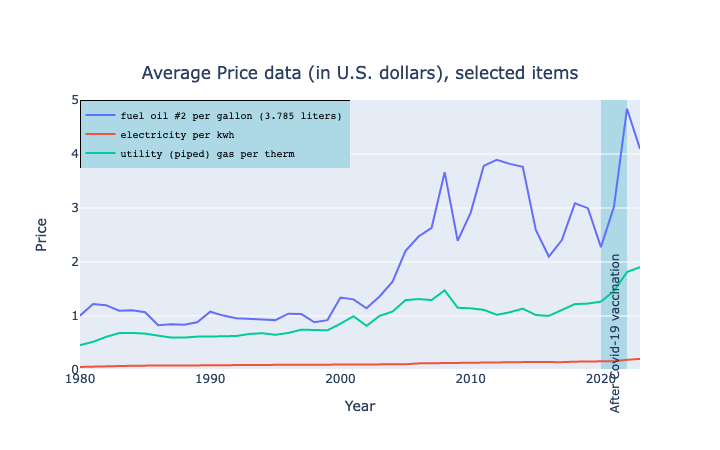

In [149]:
#Task1
food_names = [' ']
years = [1980, 2023]


df1 = pd.DataFrame(columns = df_householdfuels_price.columns)
for s in food_names:
    df = df_householdfuels_price[df_householdfuels_price['item_name'].str.contains(s)]
    df1 = pd.concat([df1, df], axis = 'rows')
    
df1 = df1[(df1.year >= years[0]) & (df1.year <= years[1])]
df1 = df1.groupby(['item_code', 'year']).agg({'value':'mean'})
df1 = df1.reset_index()
df1 = pd.merge(df1, df_item, on = 'item_code')
uniq_item_codes = df1['item_code'].unique()
uniq_years = df1['year'].unique()

#reserve the item_codes for next task
uniq_item_code_T1 = []

data = []

for ic in uniq_item_codes:
    df = df1[df1['item_code'] == ic]    
    if df.shape[0] < len(uniq_years):
        continue

    uniq_item_code_T1.append(ic)
    trace = go.Scatter(
                    x = df.year,
                    y = df.value,
                    mode = "lines",
                    name = df['item_name'].values[0],
                    text= df['item_name'].values[0])

    data.append(trace)

layout = go.Layout(
        width=700, height=450,    
        title=go.layout.Title(text='Average Price data (in U.S. dollars), selected items', 
                              y = 0.85, x = 0.5, xanchor = 'center', yanchor = 'top'),
        legend = dict(y = 1, x = 0, title_font_family="Times New Roman",
                      font=dict(
                                family="Courier",
                                size=10,
                                color="black"),
                      bgcolor="LightBlue",
                      bordercolor="Black",
                      borderwidth=0.5),
        xaxis=dict(title = 'Year', showgrid=False),
        yaxis=dict(title= 'Price', range=[0, 5], showgrid=True),
        showlegend=True
    )

fig = go.Figure(data = data, layout = layout)



fig.add_vrect(
    x0=2020, x1=2022,
    #opacity=0.5,
    layer="below", line_width=0,
    fillcolor="lightblue",
    line_color="LightSeaGreen",
)
fig.add_annotation(x=2021, y=.5,
            text="After Covid-19 vaccination",
            textangle=-90,
            showarrow=False,
            yshift=10)
fig.show()

